In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train=pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\2 Credit Card Fraud Detection\data\split\train.csv")
df_val=pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\2 Credit Card Fraud Detection\data\split\val.csv")
df_test=pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\2 Credit Card Fraud Detection\data\split\test.csv")
pd.set_option("display.max_columns",100)

In [ ]:
df_train.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,0.293539,0.427682,0.504109,-0.989043,0.761661,-0.984511,-0.296433,-0.336666,-0.231668,0.544180,-0.269148,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,-0.143353,-0.947576,-0.541060,-0.817426,0.564658,1.276676,0.046158,-0.176105,-0.676223,0.038731,-0.033806,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,1.057386,-1.317899,-0.768390,-1.081373,0.133451,0.447815,0.575453,-0.158101,-0.903597,-2.798035,0.509795,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [ ]:
df_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,170884.0,94966.107886,47464.723773,0.000000,54348.000000,84923.500000,139404.000000,172792.000000
V1,170884.0,-0.001070,1.958944,-46.855047,-0.922071,0.016603,1.316250,2.451888
V2,170884.0,-0.000904,1.650481,-63.344698,-0.599127,0.065839,0.802518,22.057729
V3,170884.0,-0.002722,1.521820,-48.325589,-0.896376,0.177007,1.028302,4.226108
V4,170884.0,-0.002603,1.416490,-5.683171,-0.848978,-0.020895,0.738812,16.875344
V5,170884.0,0.000151,1.394123,-113.743307,-0.691840,-0.054185,0.612154,34.099309
V6,170884.0,0.000779,1.338331,-23.496714,-0.768986,-0.274228,0.400359,73.301626
V7,170884.0,-0.000811,1.260122,-43.557242,-0.554440,0.040417,0.569221,120.589494
V8,170884.0,-0.002327,1.208709,-73.216718,-0.209596,0.021461,0.326026,18.282168
V9,170884.0,-0.000622,1.098393,-13.434066,-0.642036,-0.051777,0.595095,10.392889


In [ ]:
df_train.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df_train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df_train.duplicated().sum()  # is it normal ?

448

In [ ]:
df_train[df_train.duplicated()].sort_values(by="Time")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142999,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
122412,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
76829,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
77086,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
153809,1308.0,-1.322313,0.863591,1.844234,1.089375,0.771005,0.152191,1.491514,-0.917308,0.765538,1.645725,-0.046283,0.097474,0.359237,-1.218819,0.418677,-1.621802,0.143536,-0.922803,0.752663,0.521105,-0.340315,0.315702,-0.133591,0.107112,0.246560,-0.309290,-0.510963,-0.349976,25.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159911,170731.0,2.033492,0.766969,-2.107555,3.631952,1.348594,-0.499907,0.945159,-0.286392,-1.370581,1.653073,-1.600434,-1.510901,-2.143280,1.189850,-0.875588,0.175808,-0.419433,-0.464717,-1.414528,-0.430560,0.241894,0.658545,-0.102644,0.580535,0.643637,0.347240,-0.116618,-0.078601,0.76,0
122551,170731.0,2.033492,0.766969,-2.107555,3.631952,1.348594,-0.499907,0.945159,-0.286392,-1.370581,1.653073,-1.600434,-1.510901,-2.143280,1.189850,-0.875588,0.175808,-0.419433,-0.464717,-1.414528,-0.430560,0.241894,0.658545,-0.102644,0.580535,0.643637,0.347240,-0.116618,-0.078601,0.76,0
118330,170731.0,2.033492,0.766969,-2.107555,3.631952,1.348594,-0.499907,0.945159,-0.286392,-1.370581,1.653073,-1.600434,-1.510901,-2.143280,1.189850,-0.875588,0.175808,-0.419433,-0.464717,-1.414528,-0.430560,0.241894,0.658545,-0.102644,0.580535,0.643637,0.347240,-0.116618,-0.078601,0.76,0
97127,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0


In [ ]:
df_train[df_train.duplicated()]["Class"].value_counts()

Class
0    440
1      8
Name: count, dtype: int64

In [ ]:
df_train["Time"].nsmallest(10)

50325      0.0
52043      0.0
66399      1.0
75919      2.0
161453     2.0
23838      7.0
122354    10.0
158267    12.0
63556     13.0
85027     16.0
Name: Time, dtype: float64

In [ ]:
df_train["Time"].nlargest(10)

99216     172792.0
168319    172788.0
101774    172784.0
17454     172783.0
127085    172782.0
168164    172782.0
76191     172780.0
2490      172778.0
4348      172774.0
38212     172774.0
Name: Time, dtype: float64

In [ ]:
(172792/60)/60

47.99777777777778

In [ ]:
df_train["Amount"].nlargest(10)

115783    25691.16
73107     19656.53
26918     18910.00
83157     12910.93
153398    11898.09
45640     10199.44
134388     8790.26
64500      8360.00
64560      7862.39
103953     7636.30
Name: Amount, dtype: float64

In [ ]:
df_train["Amount"].nsmallest(10)

370     0.0
804     0.0
1042    0.0
1662    0.0
1853    0.0
2029    0.0
2284    0.0
2554    0.0
2682    0.0
2906    0.0
Name: Amount, dtype: float64

In [ ]:
df_train["Class"].value_counts()

Class
0    170579
1       305
Name: count, dtype: int64

In [ ]:
gp=df_train.groupby(["Class"])[["Amount","Time"]].agg(["sum","mean",])
gp

Amount                      Time              
               sum        mean           sum          mean
Class                                                     
0      15086579.21   88.443356  1.620415e+10  94994.996301
1         38658.06  126.747738  2.403691e+07  78809.527869

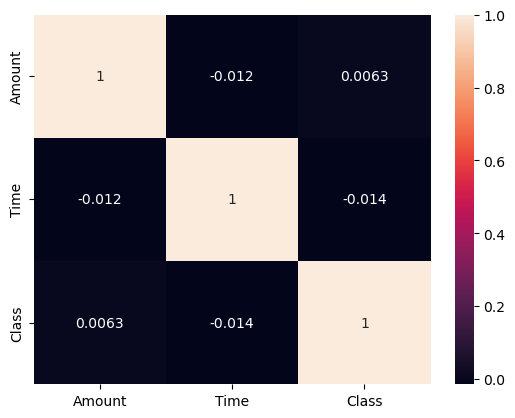

In [ ]:
sns.heatmap(df_train[["Amount","Time","Class"]].corr(),annot=True)
plt.show()

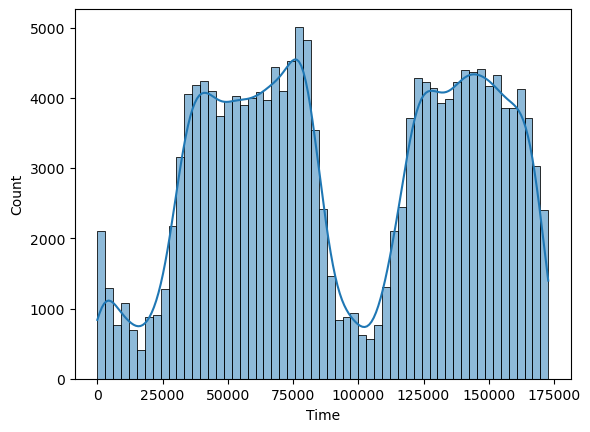

In [ ]:
sns.histplot(df_train["Time"],kde=True)
plt.show()

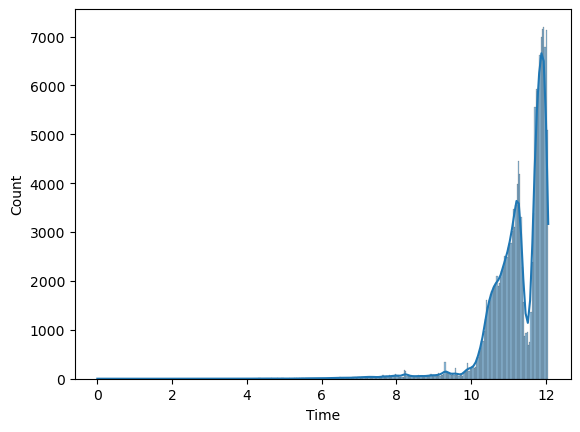

In [ ]:
df_log=np.log1p(df_train["Time"])
sns.histplot(df_log,kde=True)
plt.show()

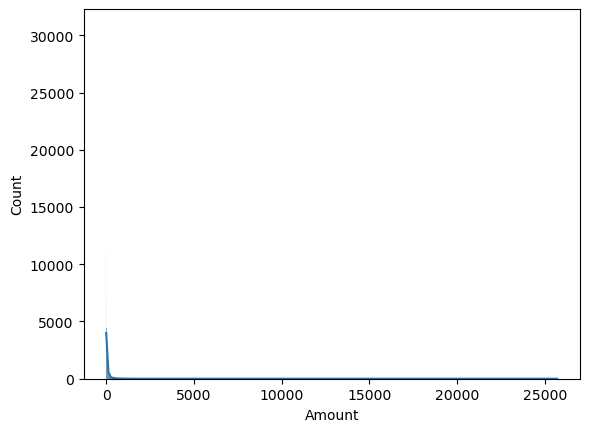

In [ ]:
sns.histplot(df_train["Amount"],kde=True)
plt.show()

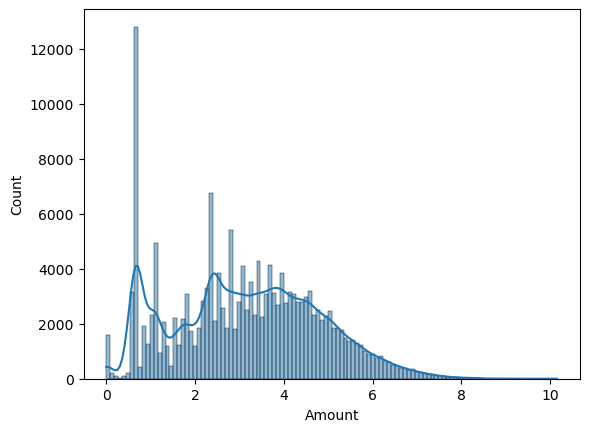

In [ ]:
df_log=np.log1p(df_train["Amount"])
sns.histplot(df_log,kde=True)
plt.show()

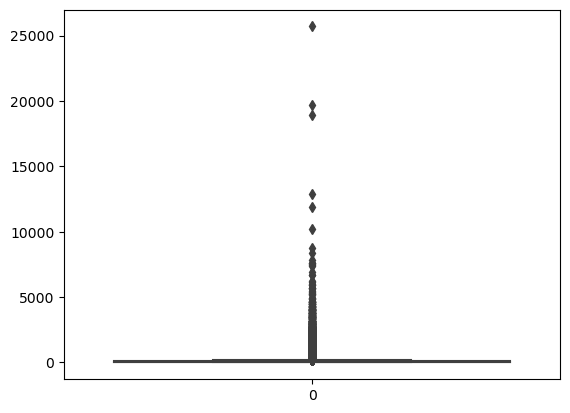

In [ ]:
sns.boxplot(df_train["Amount"])
plt.show()

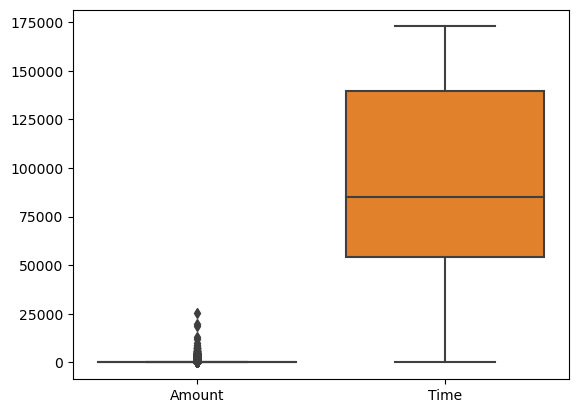

In [ ]:
sns.boxplot(df_train[["Amount","Time"]])
plt.show()

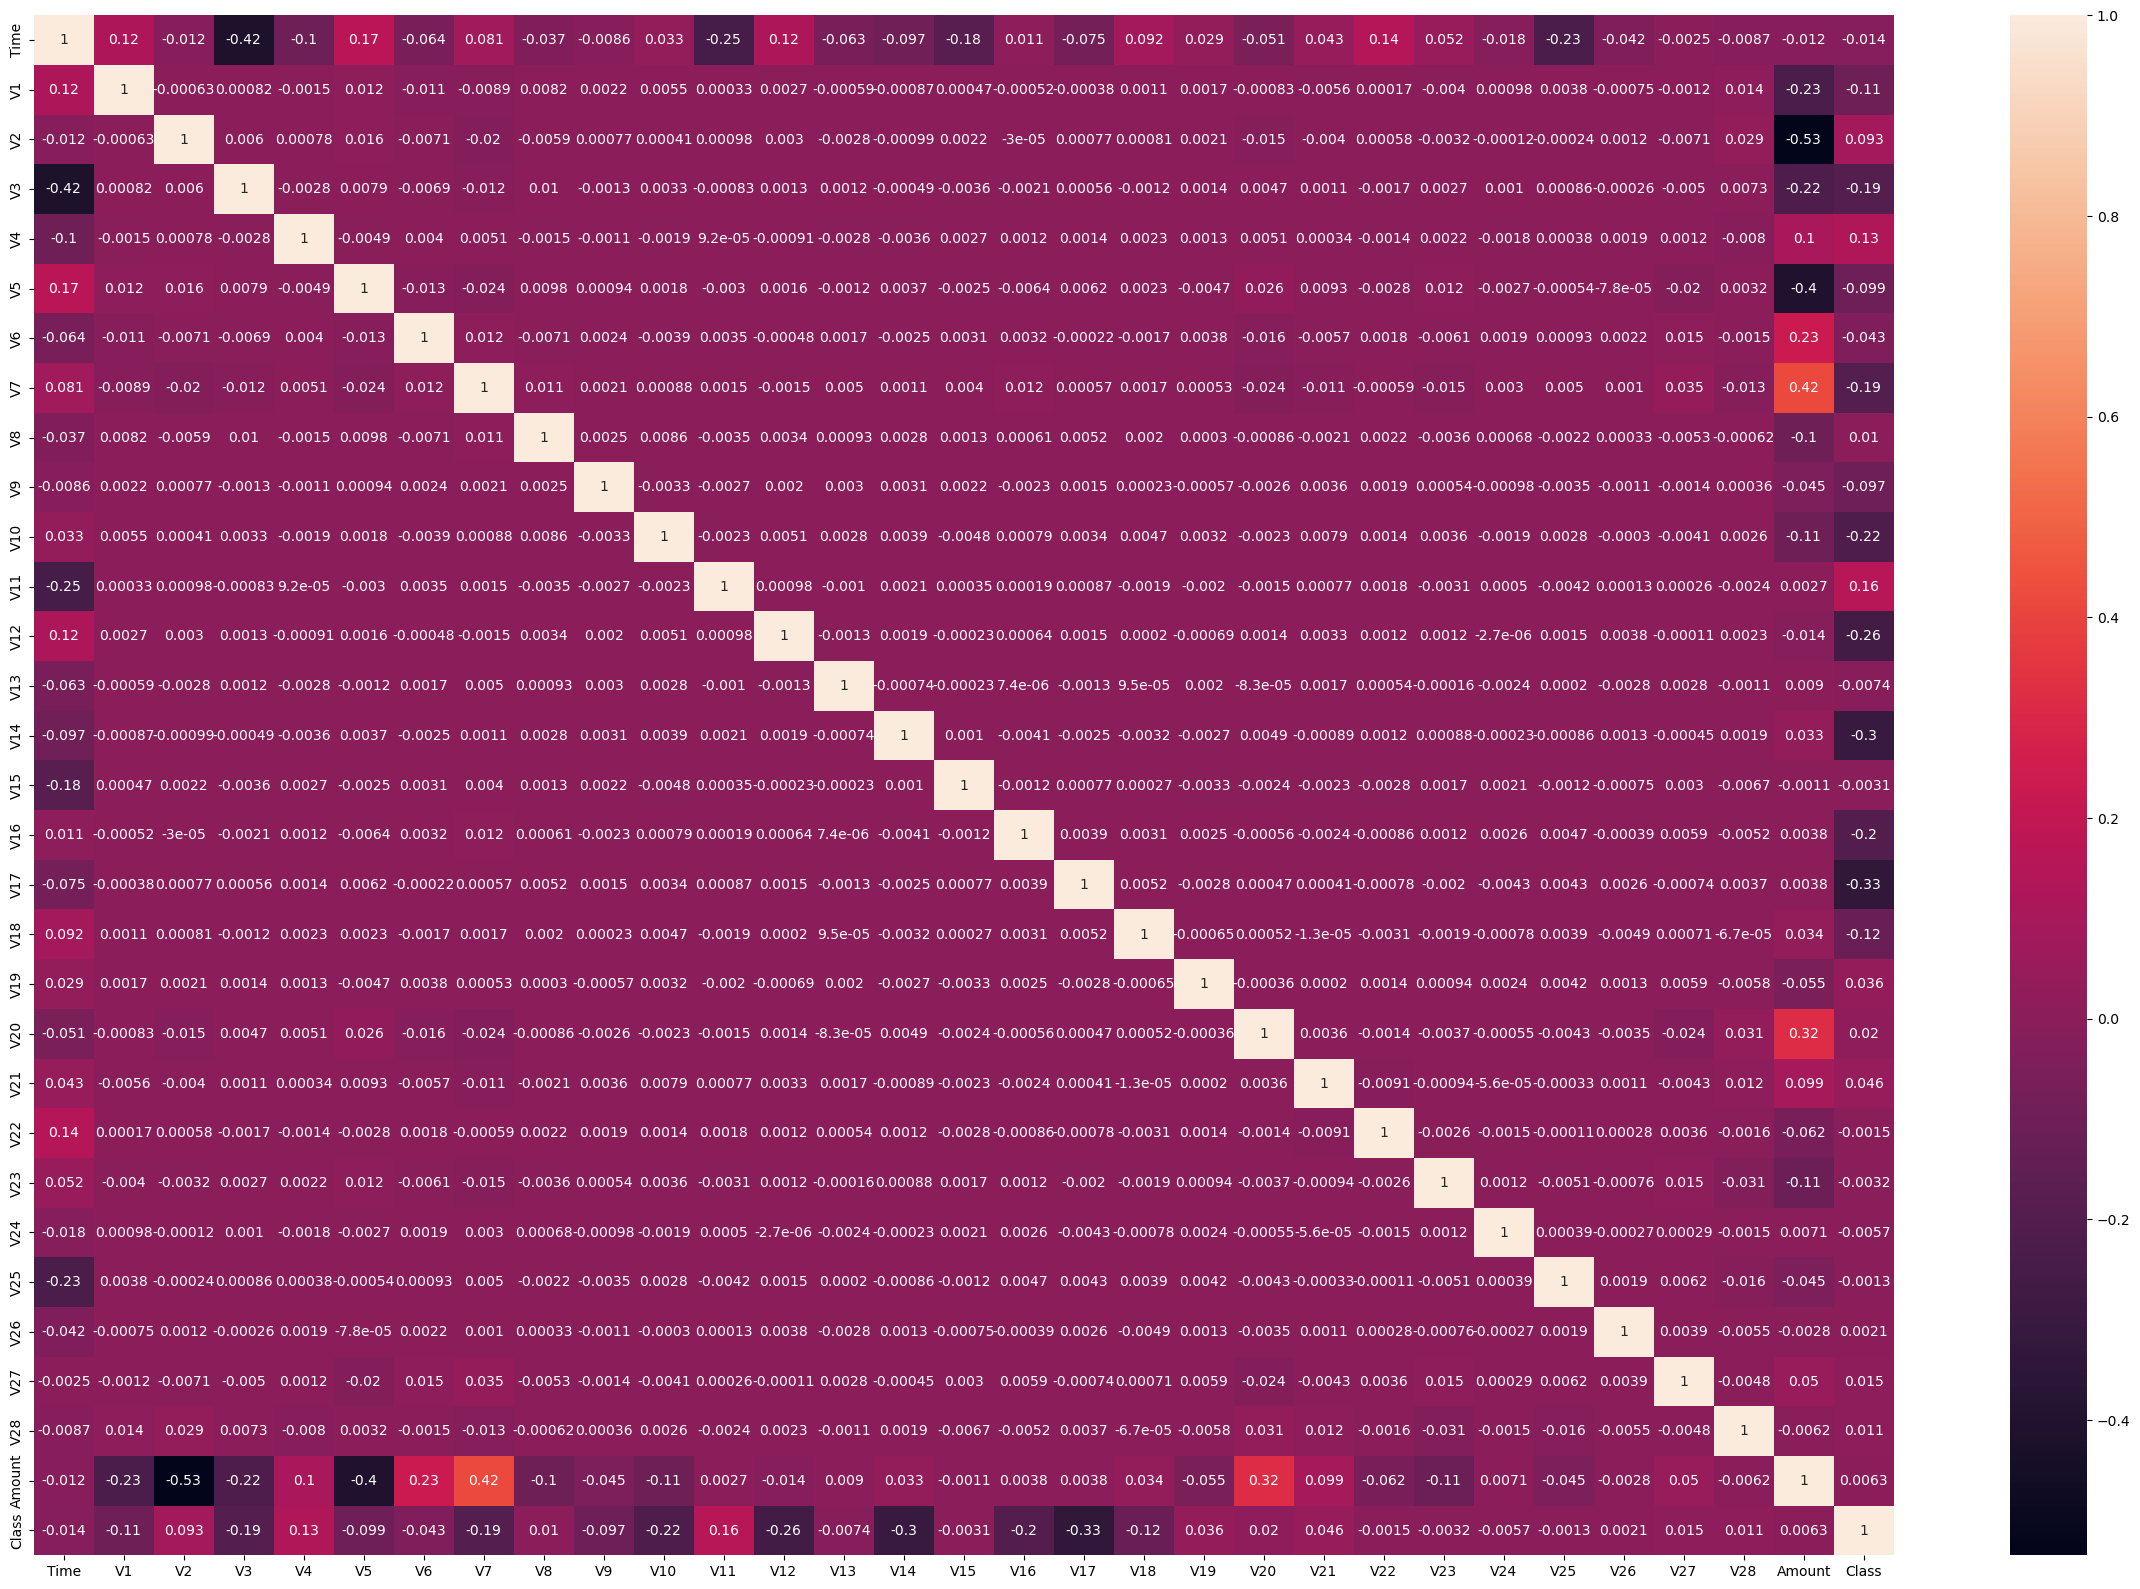

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [ ]:
f=df_train["Class"]==1
df_train_fruad=df_train[f]
f=df_train["Class"]==0
df_train_not_fruad=df_train[f]

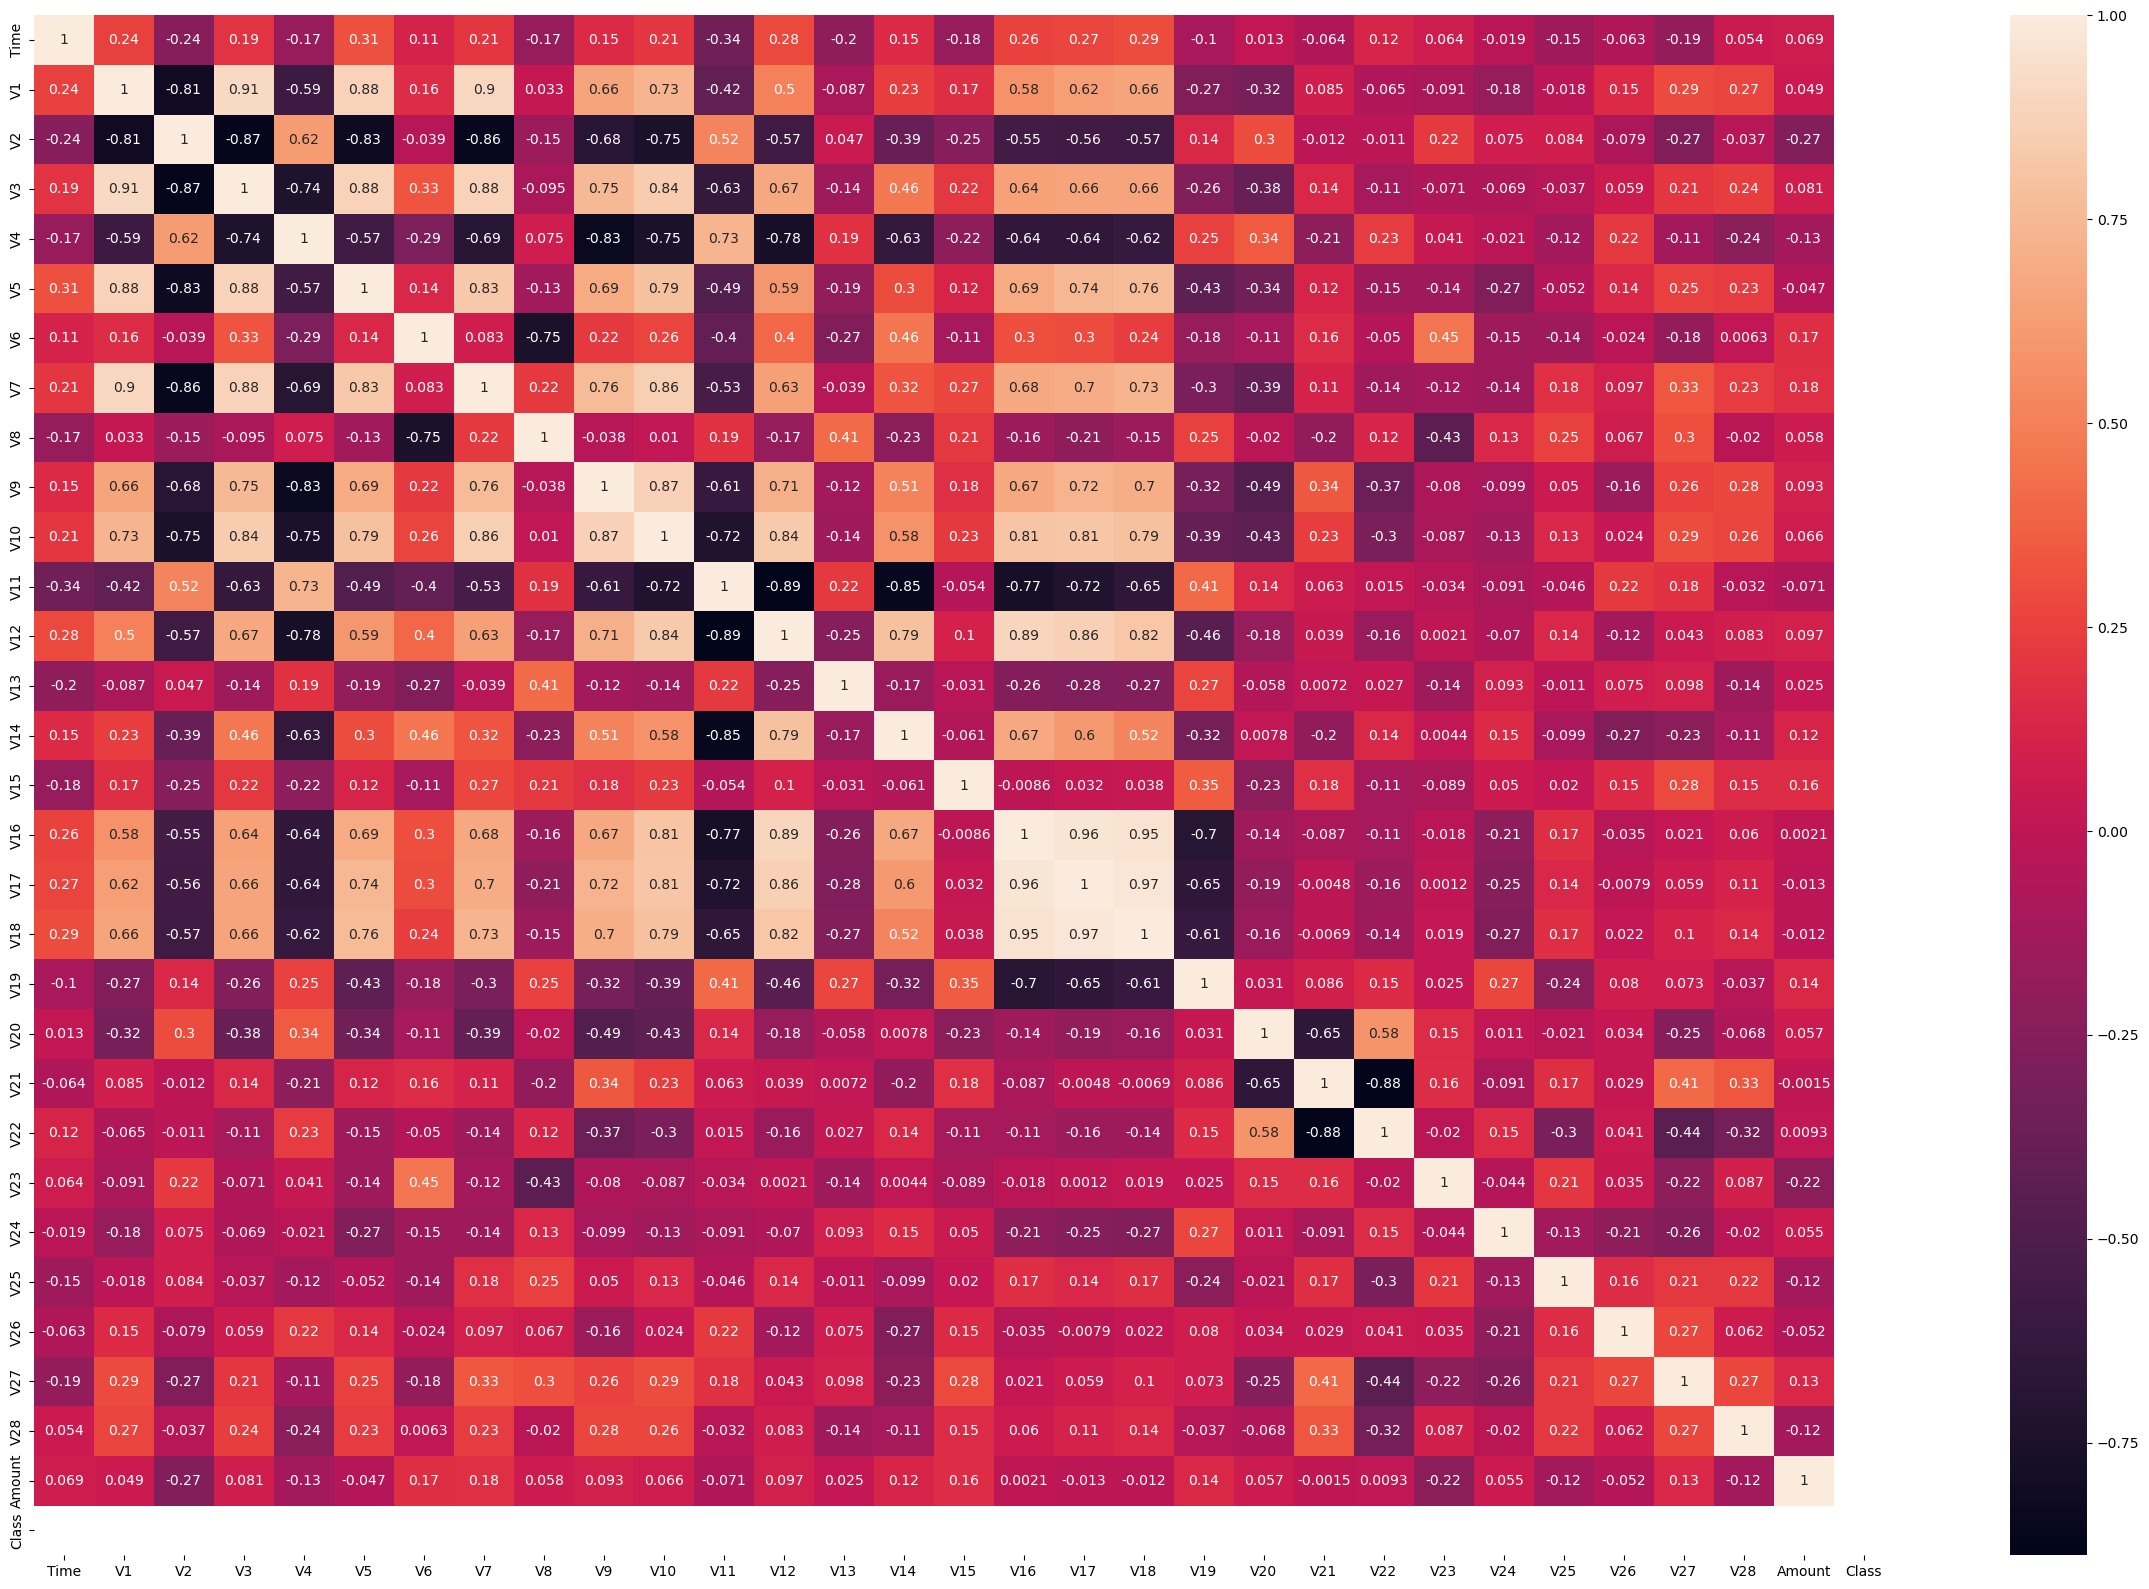

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train_fruad.corr(),annot=True)
plt.show()

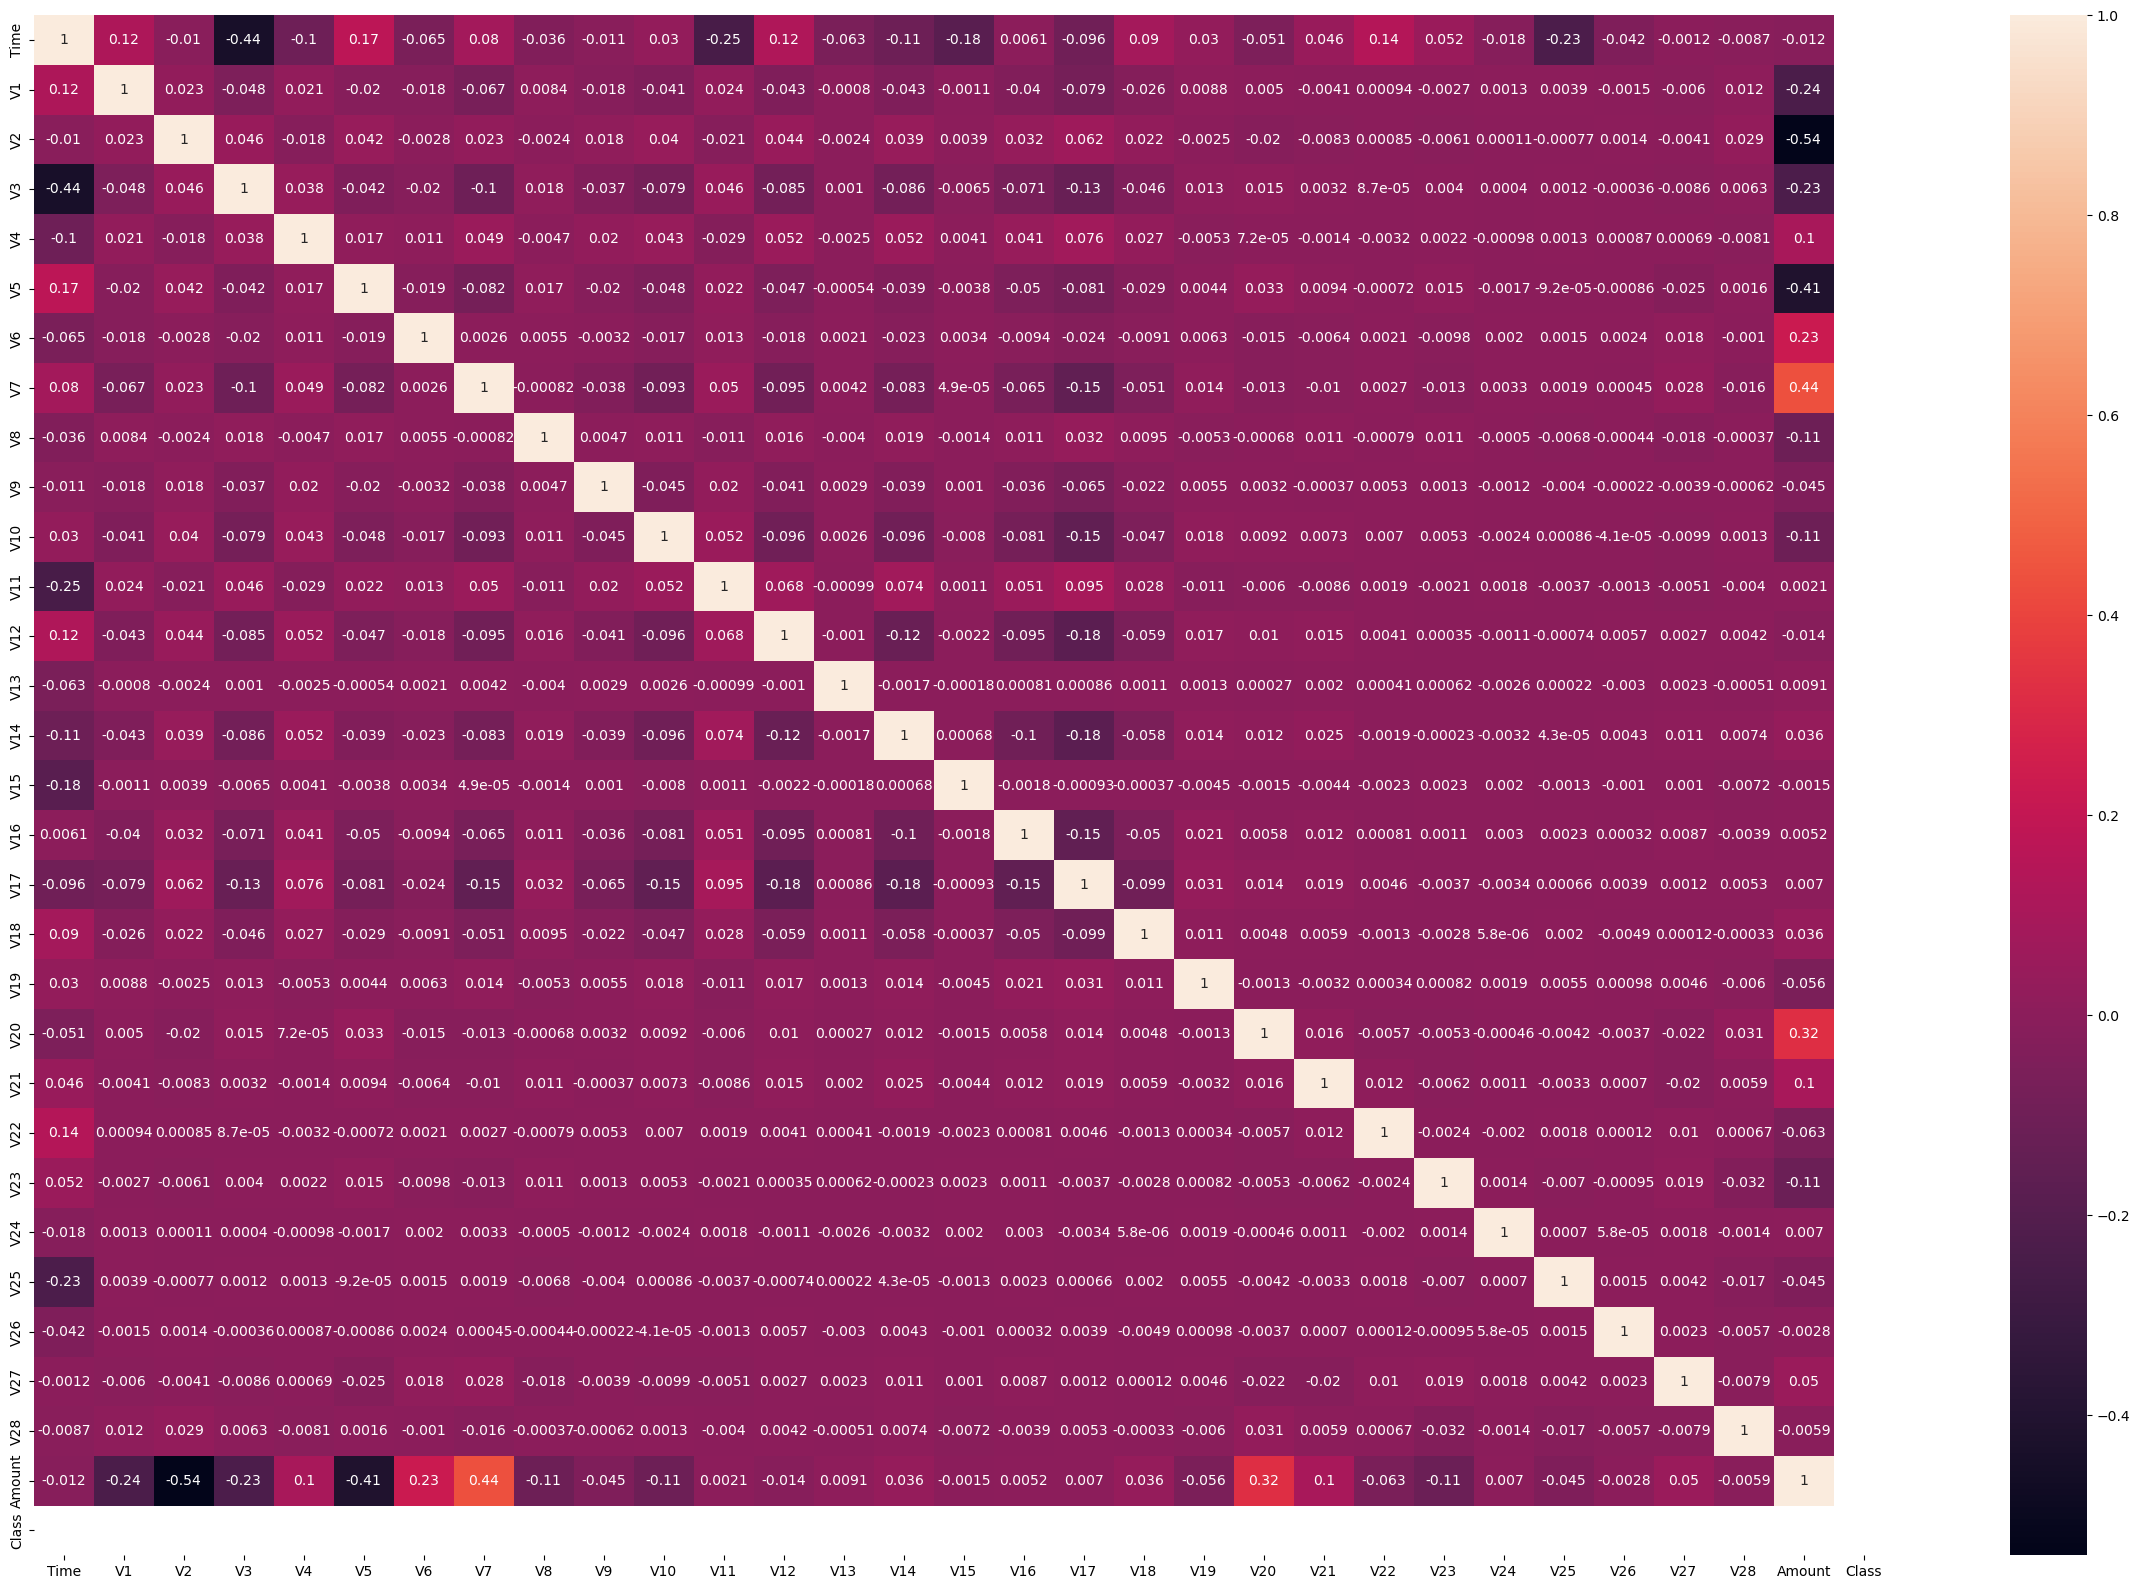

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df_train_not_fruad.corr(),annot=True)
plt.show()

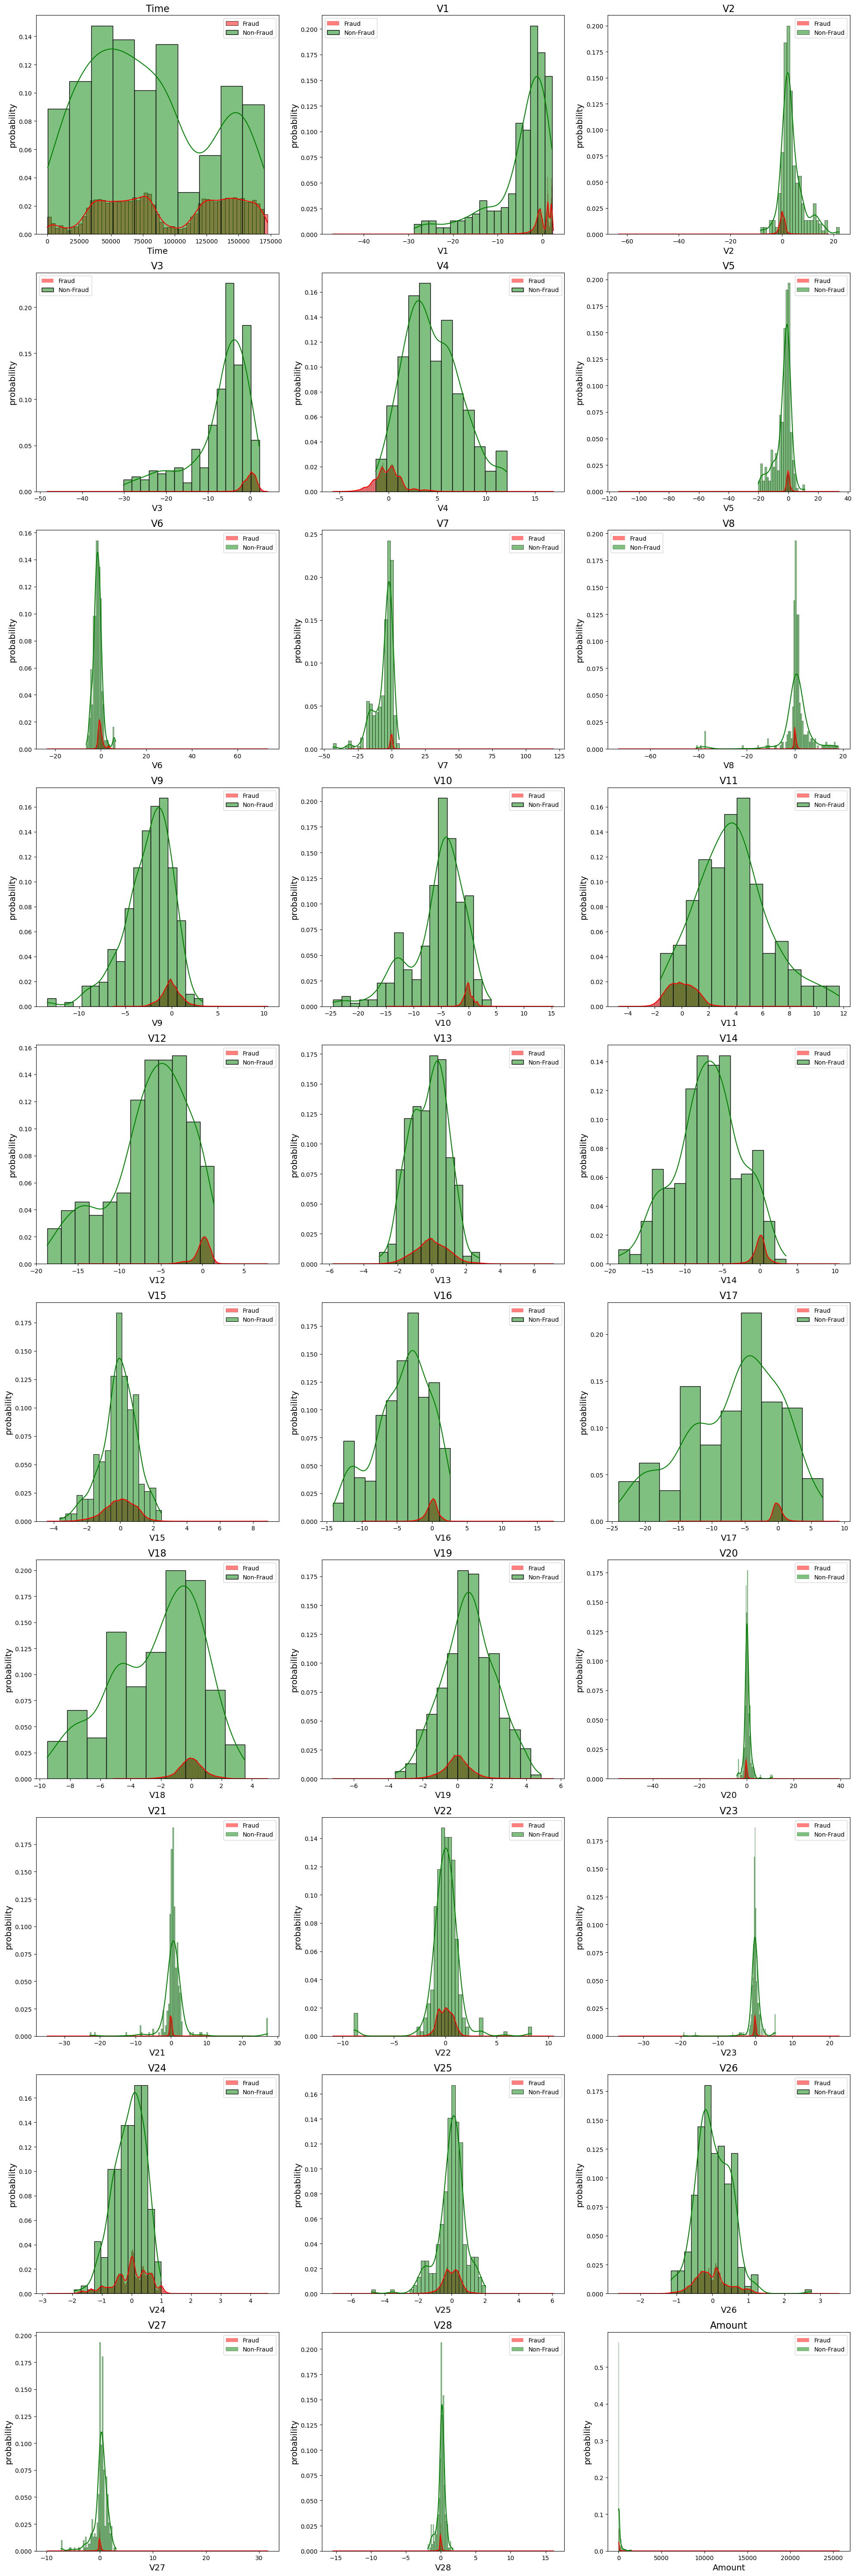

In [ ]:
figure = plt.figure(figsize=(20, 60))
for i, col in enumerate(df_train.columns.to_list()):
    if col == 'Class':
        continue
    plt.subplot(10, 3, i + 1)
    sns.histplot(df_train_not_fruad[col], color='red', label='Fraud',stat='probability', kde=True, fill=True, alpha=0.5)
    sns.histplot(df_train_fruad[col], color='green', label='Non-Fraud',stat='probability', kde=True, fill=True, alpha=0.5)
    plt.title(col, fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('probability', fontsize=14)
    plt.legend()
plt.tight_layout()
plt.show()

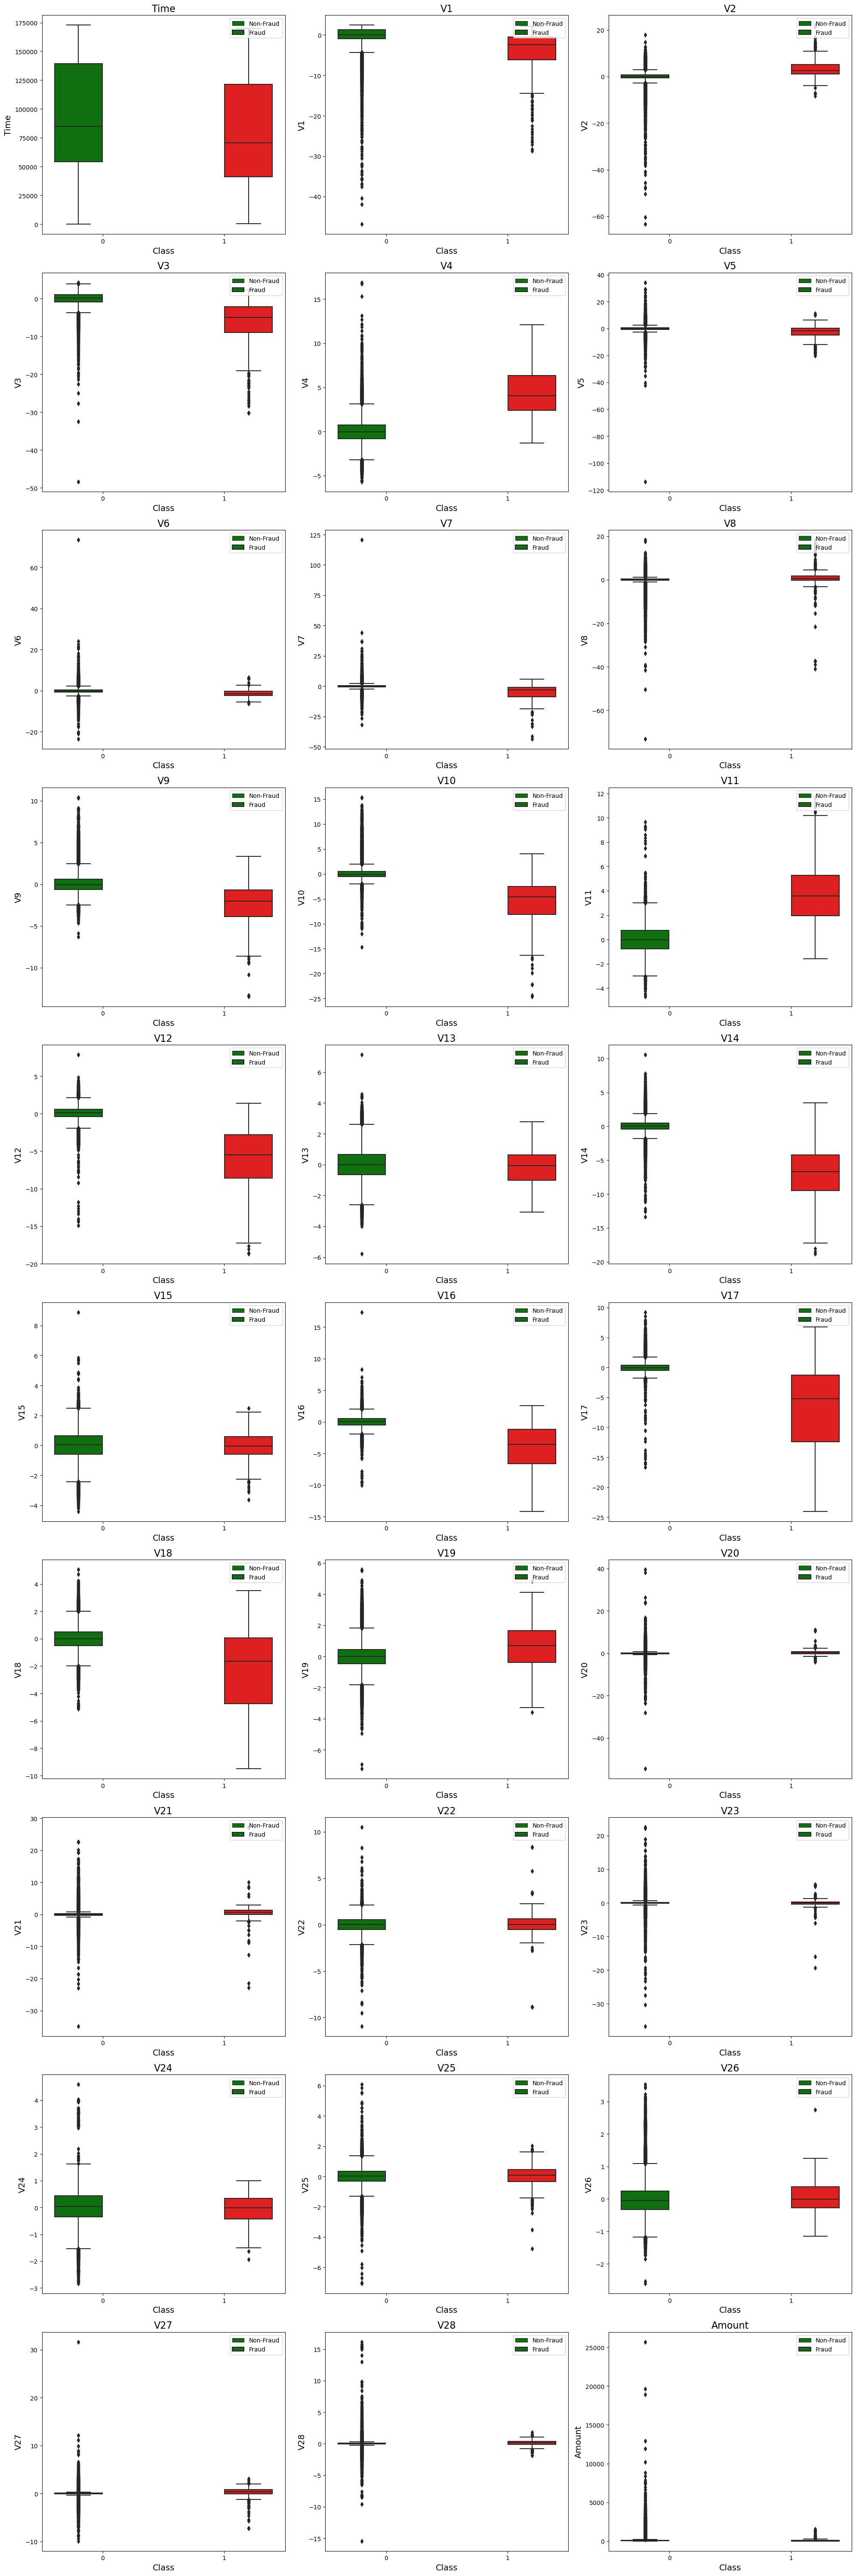

In [ ]:
figure = plt.figure(figsize=(20, 60))
for i, col in enumerate(df_train.columns.to_list()):
    if col == 'Class':
        continue
    plt.subplot(10, 3, i + 1)
    sns.boxplot(x='Class', y=col, data=df_train, hue='Class',palette=['green', 'red'])
    plt.title(col, fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pca=PCA(n_components=2)
y=df_train["Class"]
x=df_train.drop(columns=["Class"])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_pca=pca.fit_transform(x_scaled)


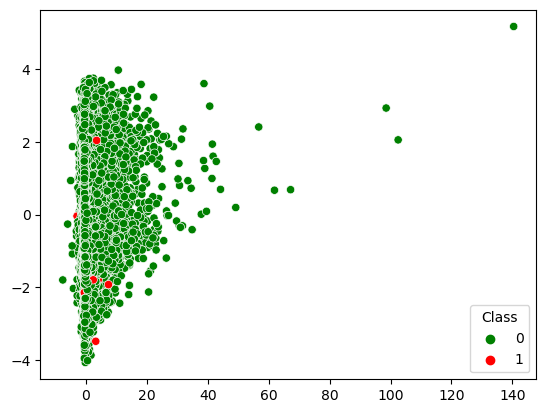

In [ ]:
#plt.scatter(x_tsne[:,0],x_tsne[:,1],cmap=y)
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y, palette=['green', 'red'])
plt.show()

# End of EDA